## Loading custom data to `backtrader`

At the moment of writing this (2020-03-20), there is an issue with downloading stock prices from Yahoo Finance using `backtrader`'s built-in functionalities. In this Notebook, I show a possible workaround. I will use the same example as in recipe *Backtesting a Strategy Based on Simple Moving Average* from Chapter 2.

### How to do it...

#### Signal 

1. Import the libraries:

In [1]:
%matplotlib inline

In [2]:
from datetime import datetime
import backtrader as bt
import yfinance as yf

2. Define a class representing the trading strategy:

In [3]:
class SmaSignal(bt.Signal):
    params = (('period', 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

3. Download data from Yahoo Finance:

First, we download the adjusted prices from Yahoo Finance using the `yfinance` library:

In [4]:
aapl_df = yf.download('AAPL', 
                      start='2018-01-01', 
                      end='2018-12-31',
                      progress=False,
                      auto_adjust=True)

aapl_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,164.770538,166.842757,163.899035,166.804016,25555900
2018-01-03,167.065464,169.021489,166.513526,166.774963,29517900
2018-01-04,167.075136,167.975688,166.629714,167.549622,22434600
2018-01-05,167.946627,169.815491,167.568980,169.457214,23660000
2018-01-08,168.827820,170.047907,168.421109,168.827820,20567800


Then, we feed the DataFrame to `backtrader` using `bt.feeds.PandasData`. For more information, please refer to the [official documentation](https://www.backtrader.com/docu/pandas-datafeed/pandas-datafeed/).

In [5]:
data = bt.feeds.PandasData(dataname=aapl_df)

4. Set up the backtest:

In [6]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

5. Run the backtest:

In [7]:
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1011.52


The small difference in results (as compared to the book) can be easily caused by different approximation of the stock prices.

6. Plot the results:

<IPython.core.display.Javascript object>


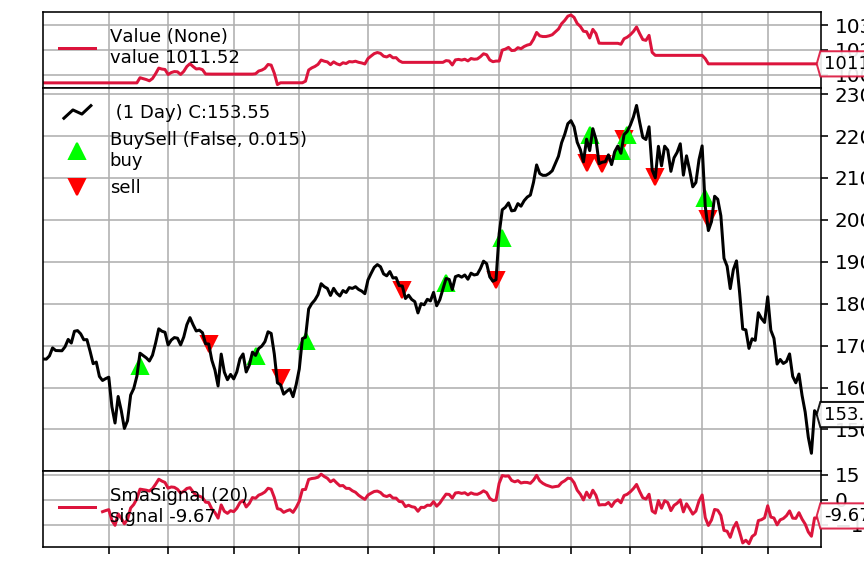

[[<Figure size 432x288 with 3 Axes>]]

In [8]:
cerebro.plot(iplot=True, volume=False)